![header2.png](attachment:header2.png)

# Hands-On

Hands-On ini digunakan pada kegiatan Microcredential Associate Data Scientist 2021

# Pertemuan 8

Pertemuan 8 (delapan) pada  Microcredential Associate Data Scientist 2021 menyampaikan materi mengenai Membersihkan Data dan Memvalidasi Data

### **DATA CLEANSING & Handling Missing Values**
---

Value yang hilang serta tidak lengkap dari dataframe akan membuat analisis atau model prediksi yang dibuat menjadi tidak akurat dan mengakibatkan keputusan salah yang diambil. Terdapat beberapa cara untuk mengatasi data yang hilang/tidak lengkap tersebut.

Kali ini, kita akan menggunkan Dataset Iris yang kotor / terdapat nilai NaN dan outliers

![image.png](attachment:image.png)

                            Info dataset: Dataset ini berisi ukuran/measures 3 spesies iris

## Pada Tugas Mandiri Pertemuan 8 

#### silakan Anda kerjakan Latihan 1 s/d 20. Output yang anda lihat merupakan panduan yang dapat Anda ikuti dalam penulisan code :)

# Latihan (1)

### Melakukan import library yang dibutuhkan

In [59]:
# import library pandas
import pandas as pd

# import library numpy
import numpy as np

# import library matplotlib
import matplotlib.pyplot as plt

# import library seaborn
import seaborn as sns

# me non aktifkan peringatan pada python dengan import warning -> 'ignore'
import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [60]:
#Panggil file (load file bernama Iris_unclean.csv) dan simpan dalam dataframe Lalu tampilkan 10 baris awal dataset dengan function head()
df = pd.read_csv('/content/Iris_unclean.csv')
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,NaN,3.5,1.4,0.2,Iris-setosa
1,4.9,2000.0,1.4,0.2,Iris-setosa
2,4.7,3.2,-1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,NaN,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,-1.5,0.2,Iris-setosa
8,4.4,1500.0,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


**Kegiatan yang akan kita lakukan:**


* Melihat bentuk data (shape) dari data 
* Langkah selanjutnya, harus tahu kolom mana yang terdapat data hilang dan berapa banyak dengan cara:

    1. menerapkan method .info() pada dataframe yang dapat diikuti dari kode berikut ini
    2. mengetahui berapa banyak nilai hilang dari tiap kolom di dataset tersebut dengan menerapkan chaining method pada dataframe yaitu .isna().sum().
    
    
* Cek data NaN, bila ada maka hapus/drop data NaN tsb
* Cek outliers, bila ada maka hapus/drop outliers tsb

# Latihan (2)

### Review Dataset

In [61]:
# menghasilkan jumlah baris dan jumlah kolom (bentuk data) pada data df dengan fungsi .shape
df.shape

(150, 5)

In [62]:
# fungsi describe() untuk mengetahui statistika data untuk data numeric seperti count, mean, standard deviation, maximum, mininum, dan quartile.
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,148.000000,150.000000,150.000000,150.000000
mean,5.856757,26.348000,3.721333,1.198667
std,0.824964,203.117929,1.842364,0.763161
min,4.300000,2.000000,-1.500000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.375000,5.100000,1.800000
max,7.900000,2000.000000,6.900000,2.500000


In [63]:
# Informasi lebih detail mengenai struktur DataFrame dapat dilihat menggunakan fungsi info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  148 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [64]:
#cek nilai yang hilang / missing values di dalam data
df.isnull().sum()

SepalLengthCm    2
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Missing values adalah nilai yang tidak terdefinisi di dataset. Bentuknya beragam, bisa berupa blank cell, ataupun simbol-simbol tertentu seperti NaN (Not a Number), NA (Not Available), ?, -, dan sebagainya. Missing values dapat menjadi masalah dalam analisis data serta tentunya dapat mempengaruhi hasil modelling machine learning. Dari hasil diatas dataset tsb mengandung 2 data missing values pada kolom/field 'SepalLengthCm' dan beberapa outliers!



### Periksa dan Cleansing setiap kolom pada data

dalam kasus ini hint nya adalah: hanya kolom/field **'SepalLengthCm'**	**'SepalWidthCm'**	**'PetalLengthCm'** yang bermasalah dan kita hanya akan berfokus cleansing pada kolom/field tsb

## <font color='red'>1. Kolom SepalLengthCm</font>

# Latihan (3)

periksa statistik data kolom SepalLengthCm

In [65]:
df['SepalLengthCm'].describe()

count    148.000000
mean       5.856757
std        0.824964
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLengthCm, dtype: float64

# Latihan (4)

periksa jumlah nilai NaN pada kolom SepalLengthCm

In [66]:
print('Nilai NaN pada kolom SepalLengthCm berjumlah :', df['SepalLengthCm'].isnull().sum())

Nilai NaN pada kolom SepalLengthCm berjumlah : 2


# Latihan (5)

cetak index dari nilai NaN kolom SepalLengthCm dengan function np.where

In [67]:
index_nan = np.where(df['SepalLengthCm'].isnull())
index_nan

(array([0, 6]),)

# Latihan (6)

1. Cetak ukuran/dimensi dari dataframe 
2. Drop baris jika ada satu saja data yang missing dan ukuran/dimensi dari dataframe setelah di drop

In [68]:
# Cetak ukuran awal dataframe
print("Ukuran awal df: %d baris, %d kolom." % df.shape)

# Drop baris jika ada satu saja data yang missing dengan function dropna() dan cetak ukurannya 
df = df.dropna(axis=1)
print("Ukuran df setelah dibuang baris yang memiliki missing value: %d baris, %d kolom." % df.shape)

Ukuran awal df: 150 baris, 5 kolom.
Ukuran df setelah dibuang baris yang memiliki missing value: 150 baris, 4 kolom.


##  <font color='red'>2. Kolom SepalWidthCm</font>

# Latihan (7)

periksa statistik data kolom SepalWidthCm

In [69]:
df['SepalWidthCm'].describe()

count     150.000000
mean       26.348000
std       203.117929
min         2.000000
25%         2.800000
50%         3.000000
75%         3.375000
max      2000.000000
Name: SepalWidthCm, dtype: float64

Dari data diatas terlihat pada terdapat kejanggalan pada nilai max yaitu 2000cm, sedangkan Sepal Width/ lebar Kelopak bunga nampaknya tidak masuk akal bila berukuran hingga 2000cm. Sehingga dapat dipastikan ini merupakan outliers

# Latihan (8)

mendeteksi outlier dengan menggunakan boxplot pada kolom SepalWidthCm

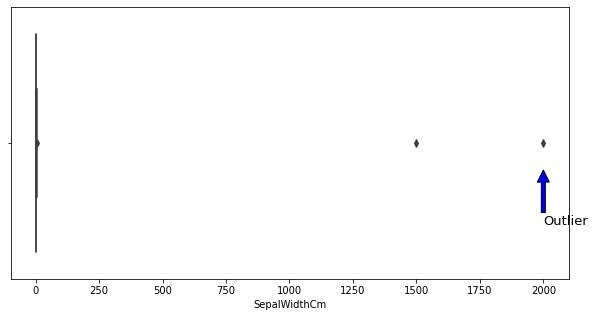

In [70]:
plt.figure(figsize = (10, 5))
sns.boxplot(df['SepalWidthCm'])
plt.annotate('Outlier', (df['SepalWidthCm'].describe()['max'],0.1), xytext = (df['SepalWidthCm'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['SepalWidthCm'].describe()['75%'] - df['SepalWidthCm'].describe()['25%']

# Latihan (9)

membuat fungsi melihat data outlier dengan rumus IQR = Q3-Q1

In [71]:
def detect_outliers(df, x):
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3-Q1
    return df[(df[x] < Q1-1.5*IQR) | (df[x] > Q3+1.5*IQR)]


# Latihan (10)

melihat data ouliers dari kolom SepalWidthCm menggunakan fungsi yang telah dibuat

In [72]:
detect_outliers(df,'SepalWidthCm')

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,2000.0,1.4,0.2,Iris-setosa
8,1500.0,1.4,0.2,Iris-setosa
15,4.4,1.5,0.4,Iris-setosa


# Latihan (11)

hapus data outlier dari kolom SepalWidthCm

In [73]:
df = df.drop((df[df['SepalWidthCm']>4]).index, axis=0)

In [74]:
df = df.drop((df[df['SepalWidthCm']<2.1]).index, axis=0)

# Latihan (12)

cek ulang outliers dengan fungsi yang telah dibuat

In [75]:
detect_outliers(df,'SepalWidthCm')

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


# Latihan (13)

cek ulang outliers dengan boxplot 

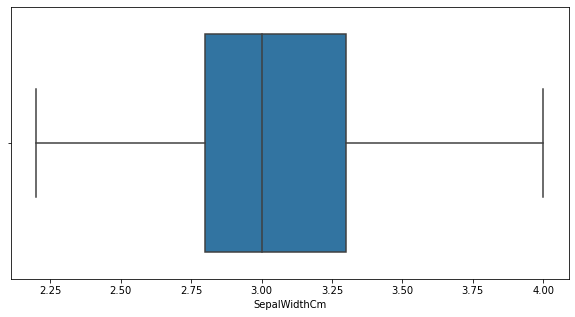

In [76]:
plt.figure(figsize = (10, 5))
sns.boxplot(df['SepalWidthCm'])

###  <font color='red'>3. Kolom PetalLengthCm</font>

# Latihan (14)

periksa statistik data kolom SepalLengthCm

In [78]:
df['PetalLengthCm'].describe()

count    144.000000
mean       3.802083
std        1.829688
min       -1.500000
25%        1.600000
50%        4.400000
75%        5.100000
max        6.900000
Name: PetalLengthCm, dtype: float64

Dari data diatas terlihat pada terdapat kejanggalan pada nilai min yaitu bernilai minus, sedangkan Petal Length/ panjang Kelopak bunga nampaknya tidak masuk akal bila berukuran minus. Sehingga dapat dipastikan ini merupakan outliers

# Latihan (15)

periksa data bernilai minus pada kolom PetalLengthCm

In [79]:
df[df['PetalLengthCm']<1]

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
2,3.2,-1.3,0.2,Iris-setosa
7,3.4,-1.5,0.2,Iris-setosa


# Latihan (16)

hapus data bernilai minus / outlier kolom PetalLengthCm

In [80]:
df = df.drop((df[df['PetalLengthCm']<1]).index, axis=0)

# Latihan (17)

cek ulang outliers dengan fungsi yang telah dibuat

In [83]:
df[df['PetalLengthCm']<1]

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


## CEK DATA SETELAH PROSES CLEANSING

# Latihan (18)

Melihat nomor index beserta tipe datanya dengan function info()

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalWidthCm   142 non-null    float64
 1   PetalLengthCm  142 non-null    float64
 2   PetalWidthCm   142 non-null    float64
 3   Species        142 non-null    object 
dtypes: float64(3), object(1)
memory usage: 5.5+ KB


# Latihan (19)

cek ulang nilai yang hilang / missing values di dalam data setelah proses cleansing

In [86]:
df.isna().sum()

SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Latihan (20)

Tampilkan 10 baris dataframe setelah proses cleansing

In [87]:
df.head(10)

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,3.5,1.4,0.2,Iris-setosa
3,3.1,1.5,0.2,Iris-setosa
4,3.6,1.4,0.2,Iris-setosa
5,3.9,1.7,0.4,Iris-setosa
6,3.4,1.4,0.3,Iris-setosa
9,3.1,1.5,0.1,Iris-setosa
10,3.7,1.5,0.2,Iris-setosa
11,3.4,1.6,0.2,Iris-setosa
12,3.0,1.4,0.1,Iris-setosa
13,3.0,1.1,0.1,Iris-setosa


### DATA SUDAH SIAP UNTUK KETAHAP SELANJUTNYA YAITU MODELLING :)